# Variational Bayesian Linear Regression (Mean Field Approximation)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from variational_lin_reg import VariationalLinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error as mse
from bayesian_regression import BayesianRegression
import time
%matplotlib inline



### Bayesian Linear Regression: Type II Maximum Likelihood vs Mean Field Approximation vs OLS

In this small tutorial we compare different methods for linear regression, namely Type II maximum likelihood Bayesian Regression, Variational Bayesian Regression and OLS.
As you can see both Type II ML and Variational Bayes provide much better mean squared error on test set compared with OLS.

In [62]:
# Parameters: 
#                    n - number of observations
#                    m - number of features
#                    n_sims - number of simulations
n,m,n_sims = 500,499,100

# timings
vlr_times, blr_times, ols_times = [],[],[]
# MSEs
mse_vlr, mse_blr, mse_ols       = [],[],[]


for i in range(n_sims):

    # generate dependent variable & highly correlated explanatory variables
    prototype = 5*np.random.random(n)
    X0        = np.outer(prototype,np.ones(m)) + 0.05*np.random.randn(n, m)
    Theta     = np.zeros(m)
    Theta[0]  = 4.
    Y0        = np.dot(X0, Theta) + np.random.normal(0,1,n)

    # split into training set and test set
    X,x,Y,y   = train_test_split(X0,Y0, test_size = 0.3, random_state = 0)

    # fit & test Variational Linear Regression
    vlr       = VariationalLinearRegression(X,Y,verbose = False,bias_term = True,
                                                                max_iter  = 100)
    vlr.fit()
    y_vlr,v_vlr = vlr.predict_dist(x)
    mse_vlr.append(mse(y_vlr,y))

    # fit & test Type II ML Bayesian Linear Regression
    blr         = BayesianRegression(X,Y,bias_term = True)
    blr.fit()
    y_blr,v_blr = blr.predict_dist(x)
    mse_blr.append(mse(y_blr,y))
    
    # fit & test OLS
    ols         = LinearRegression()
    ols.fit(X,Y)
    y_ols       = ols.predict(x)
    mse_ols.append(mse(y_ols,y))



In [63]:
print "Average MSE for Type II ML Regression is {0}".format(np.mean(mse_blr))
print "Avergae MSE for Variational Regression is {0}".format(np.mean(mse_vlr))
print "Average MSE for Ordinary Least Squares is {0}".format(np.mean(mse_ols))

Average MSE for Type II ML Regression is 1.08960403017
Avergae MSE for Variational Regression is 1.05315753706
Average MSE for Ordinary Least Squares is 3.4214150768


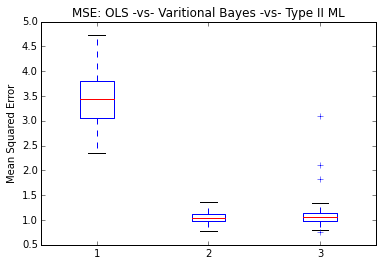

In [64]:
# compare mean squared error
bp1 = plt.boxplot((mse_ols,mse_vlr,mse_blr))
plt.title("MSE: OLS -vs- Varitional Bayes -vs- Type II ML ")
plt.ylabel("Mean Squared Error")
plt.show()